## ML With sci-kit learn: Unsupervised Learning

## Importing Packages and data

In [1]:
#%pip install -U scikit-learn 
#%pip install -U mlxtend


In [2]:
import pandas as pd 
import numpy  as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.impute import SimpleImputer # missing values
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
hotel_df = pd.read_csv("data/output/hotel_dataset_cleaned.csv")

In [5]:
hotel_df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,hotel
0,0,342,2015,July,27,1,0,0,2,0.00,...,-1.00,-1.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
1,0,737,2015,July,27,1,0,0,2,0.00,...,-1.00,-1.00,0,Transient,0.00,0,0,Check-Out,2015-07-01,Resort hotel
2,0,7,2015,July,27,1,0,1,1,0.00,...,-1.00,-1.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
3,0,13,2015,July,27,1,0,1,1,0.00,...,304.00,-1.00,0,Transient,75.00,0,0,Check-Out,2015-07-02,Resort hotel
4,0,14,2015,July,27,1,0,2,2,0.00,...,240.00,-1.00,0,Transient,98.00,0,1,Check-Out,2015-07-03,Resort hotel


## Finding groups in customers

### Step 1: Preprocessing

In [6]:
num_features = ["LeadTime","ArrivalDateWeekNumber","ArrivalDateDayOfMonth",
                "StaysInWeekendNights","StaysInWeekNights","Adults","Children",
                "Babies","PreviousCancellations",
                "PreviousBookingsNotCanceled", "ADR"]

cat_features = ["hotel","ArrivalDateMonth","Meal","MarketSegment", "IsRepeatedGuest", "RequiredCarParkingSpaces", "TotalOfSpecialRequests",
                "DistributionChannel","ReservedRoomType","DepositType","CustomerType"]

In [7]:
# Make a pipeline for the numeric values
numeric_preprocessing = make_pipeline(SimpleImputer(strategy="constant"), (StandardScaler()))

In [8]:
# Make a pipeline for the categorical values
categorical_preprocessing = make_pipeline(SimpleImputer(strategy="constant", fill_value="Unknown"), OneHotEncoder(handle_unknown='ignore'))

In [9]:
# compose the two pipelines you made
preprocessing = make_column_transformer((numeric_preprocessing, num_features), (categorical_preprocessing, cat_features))

### Step 2: PCA and Clustering

In [10]:
# Fit the pipeline to your data (include PCA in pipeline)
clust_pipe = make_pipeline(preprocessing, PCA(n_components=3), KMeans(n_clusters=5, random_state=0))
clust_pipe.fit(hotel_df)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LeadTime',
                                                   'ArrivalDateWeekNumber',
                                                   'ArrivalDateDayOfMonth',
                                                   'StaysInWeekendNights',
                                                   'StaysInWeekNights',
                                                   'Adults', 'Children',
                                                   'Babies',
                                                   'PreviousCancellations',
                                                   'Pre...
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel', 'ArrivalDateMonth',
                                                   'Meal', 'MarketSegment',
                                                   'IsRepeatedGuest',
                                                   'RequiredCarParkingSpaces',
                                                   'TotalOfSpecialRequests',
                                                   'DistributionChannel',
                                                   'ReservedRoomType',
                                                   'DepositType',
                                                   'CustomerType'])])),
                ('pca', PCA(n_components=3)),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

In [11]:
# Predict cluster labels
cluster_labels = clust_pipe.predict(hotel_df)

### Step 4: Visualisations and Evaluation

Inertia: 226519.64060717626
Silhouette Score: 0.2651640314210142
Davies-Bouldin Index: 1.1005807786904405
Calinski-Harabasz Index: 41926.62326312002


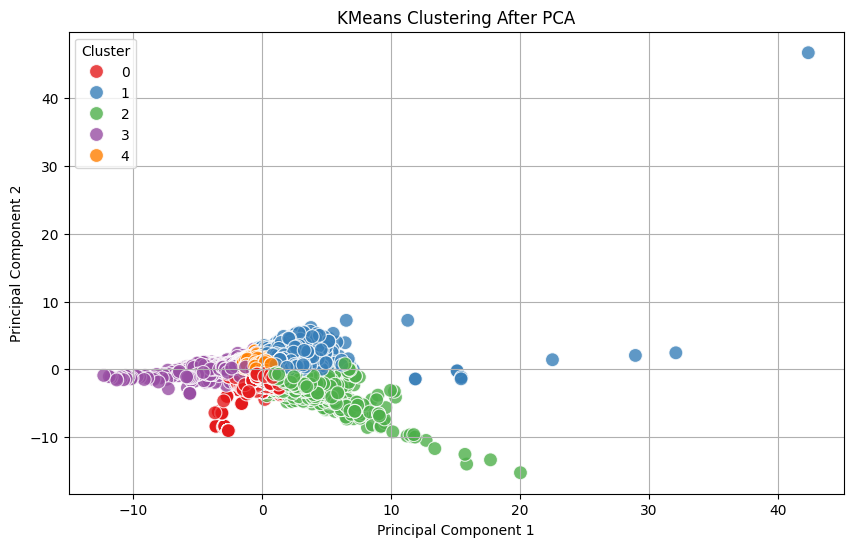

In [12]:
# Transform data using the preprocessing pipeline
X_processed = clust_pipe[:-1].transform(hotel_df)

# Inertia
inertia = clust_pipe[-1].inertia_
print(f"Inertia: {inertia}")

# Silhouette Score
silhouette = silhouette_score(X_processed, cluster_labels)
print(f"Silhouette Score: {silhouette}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_processed, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_processed, cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Visualize clusters in the reduced space (assuming 2 components for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_processed[:, 0], y=X_processed[:, 1], hue=cluster_labels, palette='Set1', s=100, alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering After PCA")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

To conclude:

- We transform the data using the preprocessing pipeline (clust_pipe[:-1].transform(hotel_df)).
- We calculate inertia, silhouette score, Davies-Bouldin index, and Calinski-Harabasz index using the transformed data (X_processed) and cluster labels (cluster_labels).
- We print out the values of these evaluation metrics.
- We visualize the clusters in the reduced space using a scatter plot, where the principal components are obtained through PCA.


In supervised learning tasks, such as regression or classification, you typically split your data into training and testing sets. When evaluating your model's performance on the testing set, you already have the ground truth labels available for comparison.However, in unsupervised learning tasks like clustering, you don't have ground truth labels available to compare against. You're grouping data points based on their similarities or patterns without knowing the "correct" clusters in advance. Therefore, you need to use evaluation metrics that are based solely on the data and the clustering results, such as inertia, silhouette score, Davies-Bouldin index, and Calinski-Harabasz index. The first step of transforming the data using the preprocessing pipeline is necessary to ensure that the data undergoes the same preprocessing steps as during training. This ensures consistency and prevents data leakage or bias in evaluation. In summary, the preprocessing step is necessary in unsupervised learning tasks like clustering to ensure that the evaluation metrics are calculated consistently using the transformed data, as there are no ground truth labels available for comparison.

Regarding the **evaluation metrics**: 
These values are typically used to evaluate the quality of a clustering algorithm's performance, particularly in the context of unsupervised learning. Each metric provides different insights into the clustering results:

- Inertia: Inertia, also known as within-cluster sum of squares, measures how tightly grouped the clusters are. It is calculated as the sum of squared distances between each data point and its nearest cluster center. Lower inertia values indicate denser clusters, meaning the data points within each cluster are closer to their centroid. Inertia provides a measure of how well the clusters are compacted. A lower inertia is generally preferred. In this case, the inertia value of 226516.547 suggests that the clusters are relatively compact, but the interpretation of this value may depend on the scale and nature of your data.
- Silhouette Score: The silhouette score measures how well-defined the clusters are. It considers both the cohesion (how close the data points are to other points in the same cluster) and the separation (how far the data points are from points in other clusters). The silhouette score ranges from -1 to 1, where a score closer to 1 indicates that the clusters are well-separated with distinct boundaries. A score close to 0 suggests overlapping clusters, and negative scores indicate that data points might have been assigned to the wrong clusters.In this case, a silhouette score of 0.265 indicates that the clusters are somewhat well-separated, but there is room for improvement.
- Davies-Bouldin Index: The Davies-Bouldin index evaluates the average similarity between each cluster and its most similar cluster, relative to the average dissimilarity between clusters. Lower values of the Davies-Bouldin index indicate better clustering, with values closer to zero implying well-separated clusters.A value of 1.100 suggests that the clusters are reasonably well-separated, but again, this interpretation may vary depending on the specific context and requirements.
- Calinski-Harabasz Index: The Calinski-Harabasz index, also known as the Variance Ratio Criterion, measures the ratio of between-cluster dispersion to within-cluster dispersion. Higher values of this index indicate denser and more well-separated clusters. It is often used to compare different clustering solutions.In this case, a Calinski-Harabasz index value of 41927.001 indicates that the clusters are relatively dense and well-separated.

In summary, these metrics provide different perspectives on the quality of the clustering results. While lower inertia, higher silhouette scores, lower Davies-Bouldin index values, and higher Calinski-Harabasz index values generally indicate better clustering performance, it's essential to consider them collectively and in the context of your specific dataset and problem domain.

### Step 5: Describing Clusters 

In [13]:
# Assign cluster labels to the original dataset
hotel_df['Cluster_Labels'] = cluster_labels

# Group the data points by cluster label
cluster_groups = hotel_df.groupby('Cluster_Labels')

# Calculate summary statistics for each cluster
cluster_descriptions = cluster_groups.describe()

# Print the summary statistics for each cluster
print(cluster_descriptions)

               IsCanceled                                    LeadTime         \
                    count mean  std  min  25%  50%  75%  max    count   mean   
Cluster_Labels                                                                 
0                19814.00 0.61 0.49 0.00 0.00 1.00 1.00 1.00 19814.00 258.30   
1                13096.00 0.36 0.48 0.00 0.00 0.00 1.00 1.00 13096.00  75.89   
2                15273.00 0.34 0.47 0.00 0.00 0.00 1.00 1.00 15273.00 140.10   
3                26227.00 0.24 0.43 0.00 0.00 0.00 0.00 1.00 26227.00  31.74   
4                44800.00 0.35 0.48 0.00 0.00 0.00 1.00 1.00 44800.00  74.26   

                ... RequiredCarParkingSpaces      TotalOfSpecialRequests       \
                ...                      75%  max                  count mean   
Cluster_Labels  ...                                                             
0               ...                     0.00 2.00               19814.00 0.20   
1               ...                

## Association rules

In [14]:
cat_features = ["hotel", "ArrivalDateMonth", "Meal", "IsRepeatedGuest", 
                "RequiredCarParkingSpaces", "TotalOfSpecialRequests", 
                "ReservedRoomType"]

# Create a copy of the DataFrame and only keep categorical variables
hotel_df_categorical = hotel_df[cat_features].copy()


# Apply one-hot encoding to categorical features
hotel_encoded = pd.get_dummies(hotel_df_categorical)

# Convert all values to boolean (0/1)
hotel_encoded = hotel_encoded.astype(bool)

In [15]:
hotel_df_categorical.head()

,hotel,ArrivalDateMonth,Meal,IsRepeatedGuest,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservedRoomType
0,Resort hotel,July,BB,0,0,0,C
1,Resort hotel,July,BB,0,0,0,C
2,Resort hotel,July,BB,0,0,0,A
3,Resort hotel,July,BB,0,0,0,A
4,Resort hotel,July,BB,0,0,1,A


In [16]:
# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(hotel_encoded, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print association rules
print(rules)


                                     antecedents           consequents  \
0                       (TotalOfSpecialRequests)             (Meal_BB)   
1                             (hotel_City hotel)             (Meal_BB)   
2                           (ReservedRoomType_A)    (hotel_City hotel)   
3                             (hotel_City hotel)  (ReservedRoomType_A)   
4                           (hotel_Resort hotel)             (Meal_BB)   
5                           (ReservedRoomType_A)             (Meal_BB)   
6                           (ReservedRoomType_D)             (Meal_BB)   
7     (TotalOfSpecialRequests, hotel_City hotel)             (Meal_BB)   
8   (TotalOfSpecialRequests, ReservedRoomType_A)    (hotel_City hotel)   
9     (TotalOfSpecialRequests, hotel_City hotel)  (ReservedRoomType_A)   
10  (TotalOfSpecialRequests, hotel_Resort hotel)             (Meal_BB)   
11  (TotalOfSpecialRequests, ReservedRoomType_A)             (Meal_BB)   
12                 (Meal_BB, ReservedR

In [17]:
# Sort association rules by lift
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Filter association rules based on minimum lift
rules_filtered = rules_sorted[rules_sorted['lift'] > 1.0]

# Print the filtered association rules
print("Filtered Association Rules:")
print(rules_filtered)

Filtered Association Rules:
                                     antecedents           consequents  \
6                           (ReservedRoomType_D)             (Meal_BB)   
12                 (Meal_BB, ReservedRoomType_A)    (hotel_City hotel)   
3                             (hotel_City hotel)  (ReservedRoomType_A)   
2                           (ReservedRoomType_A)    (hotel_City hotel)   
8   (TotalOfSpecialRequests, ReservedRoomType_A)    (hotel_City hotel)   
14                   (Meal_BB, hotel_City hotel)  (ReservedRoomType_A)   
10  (TotalOfSpecialRequests, hotel_Resort hotel)             (Meal_BB)   
1                             (hotel_City hotel)             (Meal_BB)   

    antecedent support  consequent support  support  confidence  lift  \
6                 0.16                0.77     0.14        0.86  1.12   
12                0.54                0.66     0.39        0.73  1.10   
3                 0.66                0.72     0.52        0.79  1.10   
2            

In [18]:
# Convert frozensets to strings
rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda x: ', '.join(list(x)))

# Create an interactive scatter plot using Plotly
fig = px.scatter(rules_filtered, x='support', y='confidence', hover_name='antecedents', hover_data=['consequents', 'lift'],
                 labels={'support': 'Support', 'confidence': 'Confidence'},
                 title='Association Rules: Support vs. Confidence',
                 opacity=0.5)

# Customize the layout
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    plot_bgcolor='rgba(0,0,0,0)',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)

# Show the plot
fig.show()

C:\Users\u0168570\AppData\Local\Temp\ipykernel_19836\2774935940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['antecedents'] = rules_filtered['antecedents'].apply(lambda x: ', '.join(list(x)))
C:\Users\u0168570\AppData\Local\Temp\ipykernel_19836\2774935940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_filtered['consequents'] = rules_filtered['consequents'].apply(lambda x: ', '.join(list(x)))


In [19]:
# Print the top 10 association rules
print("Top 10 Association Rules:")
rules_sorted.head(10)

Top 10 Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(ReservedRoomType_D),(Meal_BB),0.16,0.77,0.14,0.86,1.12,0.01,1.66,0.12
12,"(Meal_BB, ReservedRoomType_A)",(hotel_City hotel),0.54,0.66,0.39,0.73,1.10,0.03,1.23,0.19
3,(hotel_City hotel),(ReservedRoomType_A),0.66,0.72,0.52,0.79,1.10,0.05,1.33,0.26
2,(ReservedRoomType_A),(hotel_City hotel),0.72,0.66,0.52,0.73,1.10,0.05,1.23,0.31
8,"(TotalOfSpecialRequests, ReservedRoomType_A)",(hotel_City hotel),0.26,0.66,0.19,0.71,1.07,0.01,1.15,0.08
14,"(Meal_BB, hotel_City hotel)",(ReservedRoomType_A),0.52,0.72,0.39,0.75,1.04,0.02,1.12,0.08
10,"(TotalOfSpecialRequests, hotel_Resort hotel)",(Meal_BB),0.15,0.77,0.12,0.79,1.02,0.00,1.09,0.03
1,(hotel_City hotel),(Meal_BB),0.66,0.77,0.52,0.79,1.02,0.01,1.06,0.05
9,"(TotalOfSpecialRequests, hotel_City hotel)",(ReservedRoomType_A),0.26,0.72,0.19,0.71,0.98,-0.00,0.96,-0.02
0,(TotalOfSpecialRequests),(Meal_BB),0.41,0.77,0.31,0.76,0.98,-0.01,0.94,-0.03
